# DSC 424 Final Project

In [137]:
#Import packages
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.special import boxcox1p
import seaborn as sns
import warnings
from math import sqrt
import pylab
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline
warnings.filterwarnings('ignore')

In [121]:
#Import data
song_data = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_data.csv')
song_info = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_info.csv')

#Shape of data
print('song_data shape: ' + str(song_data.shape))
print('sing_info shape: ' + str(song_info.shape))

song_data shape: (18835, 15)
sing_info shape: (18835, 4)


In [122]:
#Columns
print('song_data columns: ' + str(list(song_data.columns)))
print('song_info columns: ' + str(list(song_info.columns))) 

song_data columns: ['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']
song_info columns: ['song_name', 'artist_name', 'album_names', 'playlist']


In [123]:
#Convert song_duration
song_data['song_duration_min'] = (song_data.song_duration_ms/1000)/60
song_data.drop(columns = ['song_name', 'song_duration_ms'], inplace = True)

In [124]:
song_data.describe()

,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
count,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967,3.636860
std,21.905654,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632,0.998126
min,0.000000,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,40.000000,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000,3.072325
50%,56.000000,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000,3.521767
75%,69.000000,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000,4.047400
max,100.000000,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000,29.989100


# Data Transform

In [125]:
#Boxcox Transform
cols_ = ['acousticness', 'instrumentalness', 'time_signature', 'song_duration_min', 'speechiness']
for col in cols_:
    if song_data[col].min() == 0: 
        song_data[col] = song_data[col] + 0.000001
    song_data[col] = stats.boxcox(song_data[col])[0]

# Notes about the variables

**Song_ popularity** [0,100] Dependent variable 

**Song_duration** [1.200000e+04,1.799346
e+06] In milliseconds 

**Acousticness** [0,0.996] 1.0 represents high confidence the track is
acoustic. 

**Danceability** [0,0.897] A value of 0.0 is least danceable and 1.0 is
most danceable 

**Energy** [0.001,0.999] A value of 1 means most energetic (tracks
feel fast, loud, and noisy) 

**Instrumentalness** [0.01,0.986] Values above 0.5 are intended to represent
instrumental tracks, but confidence is
higher as the value approaches 1.0. 

**Liveness** [0,0.997] Higher liveness values represent an
increased probability that the track was
performed live 

**Loudness** [-38.768, 1.585] values are averaged across the entire track
Speechiness [0,0.94] Values above 0.66 describe tracks that are
probably made entirely of spoken words.
Values between 0.33 and 0.66 describe
tracks that may contain both music and
speech, including such cases as rap music.
Values below 0.33 most likely represent
music and other non-speech-like tracks. 

**Tempo** [0 ,242.318] 

**Audio_valence** [0,0.984] Tracks with high valence sound more
positive (e.g. happy, cheerful, euphoric)
Ordinal
(3) 

**Key** [0,1,2,3,4,5,6,7,8,9,10,11] 0 = C, 1 = C♯/D♭, 2 = D, and so on 

**Audio_mode** [0 or 1] Major is represented by 1 and minor is 0 

**Time_signature** [0,1 ,3,4,5] Nominal (4) 

**Categorical**: 
Album_name 
song_name 
play_list 
artist_name

# NULLS

#### NOTES: 

There are no null values in the dataset

In [36]:
#Check for null values 
print(song_data.isnull().sum())
print(song_info.isnull().sum())

song_popularity      0
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
audio_mode           0
speechiness          0
tempo                0
time_signature       0
audio_valence        0
song_duration_min    0
dtype: int64
song_name      0
artist_name    0
album_names    0
playlist       0
dtype: int64


# Histograms and Boxplots

#### NOTES: 

Some of the columns such as song duration, instrumentalness, and time signature are imbalanced. Will consider removing some of the outliers to smooth the distributions. 

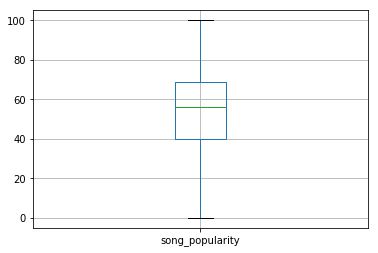

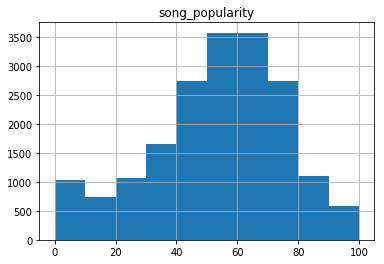

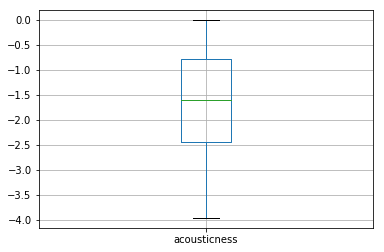

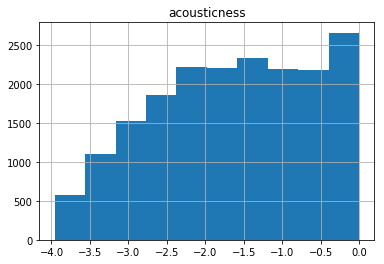

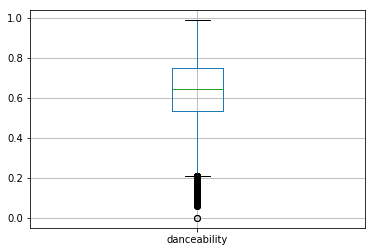

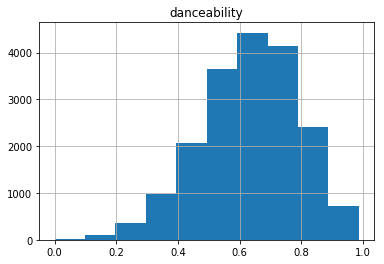

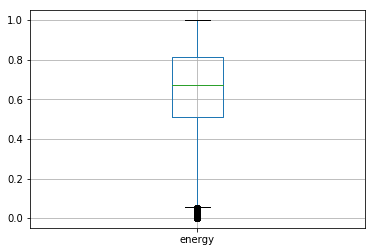

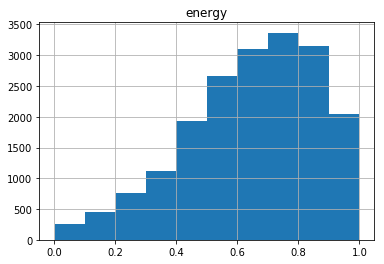

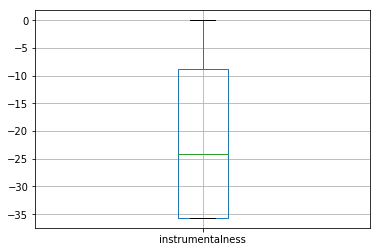

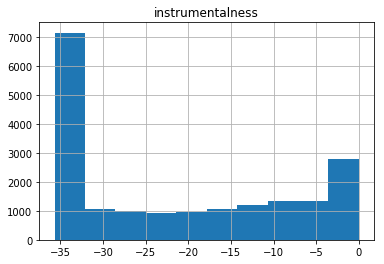

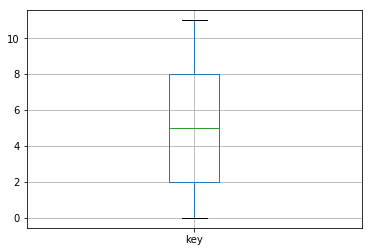

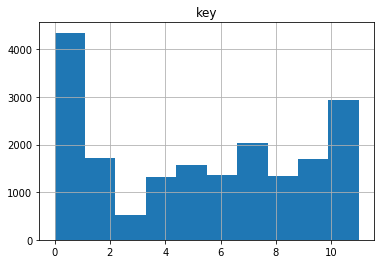

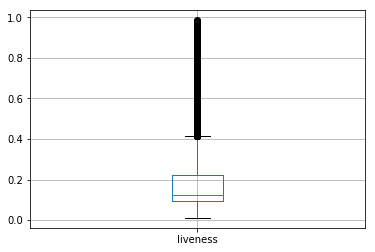

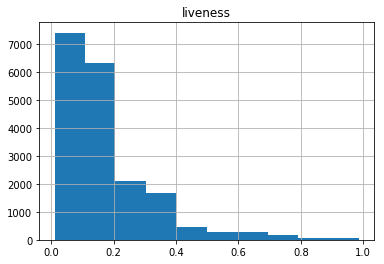

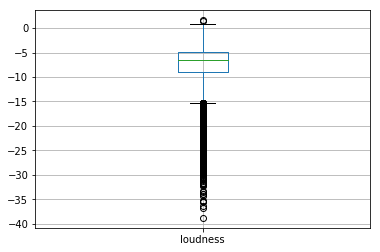

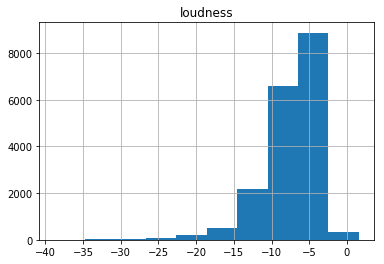

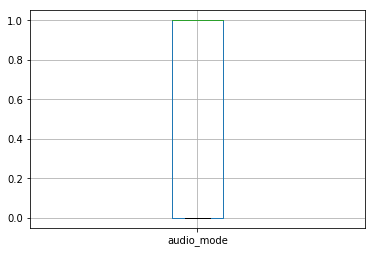

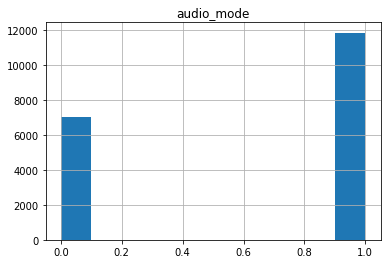

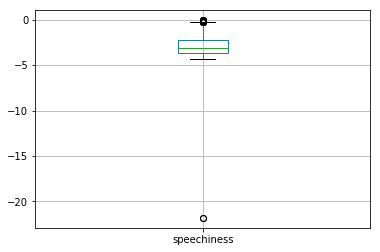

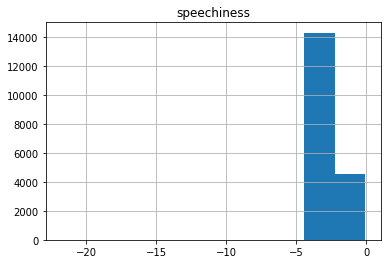

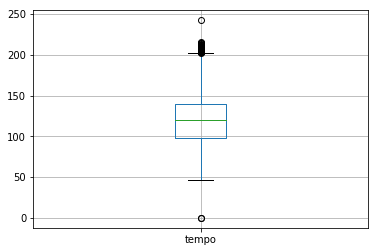

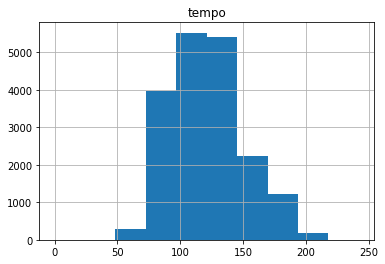

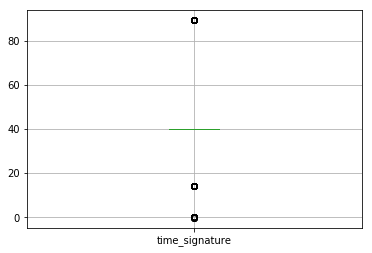

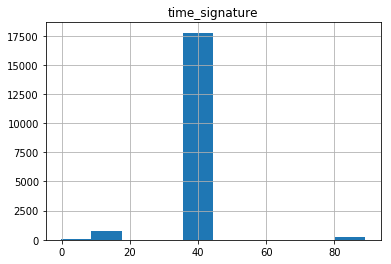

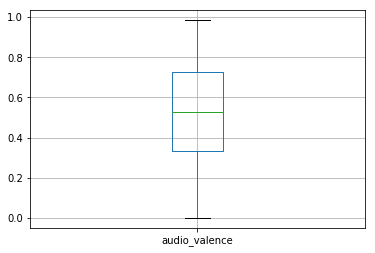

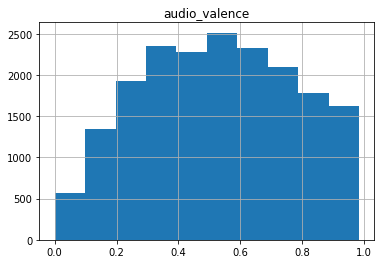

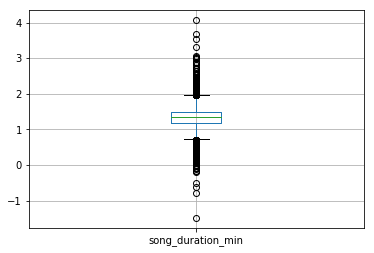

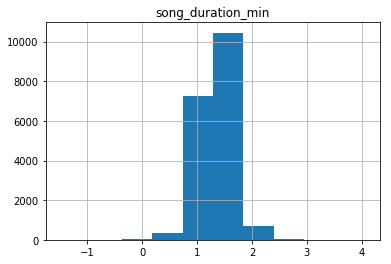

In [112]:
#Histograms
for col in song_data.columns: 
    plt.figure()
    song_data.boxplot([col])
    song_data.hist([col])

# Correlation Plot

#### NOTES: 
Loudness and energy have a moderate positive correlation. This is a logical relationship since a louder song would register high decibels resulting in a higher energy score. Will consider removing one, or creating a new variable that captures both. Acousticness and energy have a moderate negative correlation which is also logical since acoustic songs tend to be quieter, resulting in lower decibels/energy.

In [120]:
#Correlation Matrix
song_data_2.corr().style.background_gradient(cmap='coolwarm')

,song_popularity,acousticness,danceability,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
song_popularity,1,-0.00870867,0.10429,-0.183921,-0.0131604,-0.0389366,0.0994422,-0.00496934,0.0388191,-0.0226721,0.0285215,-0.0528953,0.00234942
acousticness,-0.00870867,1,-0.0201013,-0.0537072,-0.000128338,-0.0971188,-0.452842,0.0362479,-0.0894517,-0.154264,-0.0870823,-0.0287649,-0.123173
danceability,0.10429,-0.0201013,1,-0.145552,0.00772311,-0.0906937,0.177639,-0.106539,0.272338,-0.121286,0.0895414,0.332014,-0.0999078
instrumentalness,-0.183921,-0.0537072,-0.145552,1,-0.00508088,-0.037985,-0.303781,-0.00765669,-0.208924,-0.00929335,-0.042589,-0.135287,0.0563973
key,-0.0131604,-0.000128338,0.00772311,-0.00508088,1,-0.00819284,0.0104518,-0.169848,0.0399591,0.0032385,-0.0123866,0.0253563,-0.00542521
liveness,-0.0389366,-0.0971188,-0.0906937,-0.037985,-0.00819284,1,0.10245,-0.00103511,0.0911919,0.0318759,0.0133066,0.0137885,0.00903174
loudness,0.0994422,-0.452842,0.177639,-0.303781,0.0104518,0.10245,1,-0.0585065,0.142536,0.129938,0.0944374,0.199696,0.0644938
audio_mode,-0.00496934,0.0362479,-0.106539,-0.00765669,-0.169848,-0.00103511,-0.0585065,1,-0.136642,0.020448,-0.0202122,-0.00455803,-0.0286517
speechiness,0.0388191,-0.0894517,0.272338,-0.208924,0.0399591,0.0911919,0.142536,-0.136642,1,0.0972517,0.112463,0.0323729,-0.0936426
tempo,-0.0226721,-0.154264,-0.121286,-0.00929335,0.0032385,0.0318759,0.129938,0.020448,0.0972517,1,-0.0102728,0.0376669,0.0211638


# Train-Test Split

In [126]:
#Training and test sets
X = song_data.drop('song_popularity', axis = 1)
y = song_data.song_popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (13184, 13)
y_train shape: (13184,)
X_test shape: (5651, 13)
y_test shape: (5651,)


# Initial Multiple Regression

#### Notes
The initial multiple regression shows a moderately high multiple R-squared on the trianing set, though some of the additional analysis into the residuals suggest that there are some issues with the model. The normal residuals plot shows a clear slanted line at the start and increasing negative error moving to the right. The QQ also plot does not look uniform. The predicted vs. actuals on the test set do not show the correlation that we would expect by looking at the multiple R2 from the traning set. Will consider other models, removing correlated variables, feature selection, etc. 

In [127]:
#Regression
lm = sm.OLS(y_train, X_train).fit()

# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     6171.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:54:32   Log-Likelihood:                -59145.
No. Observations:               13184   AIC:                         1.183e+05
Df Residuals:                   13171   BIC:                         1.184e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
acousticness         -0.1139      0.238     -0.478      0.633      -0.581       0.353
danceability         28.2622      1.183     23.893      0.000      25.944      30.581
energy                8.4046      1.462      5.749      0.000       5.539      11.270
instrumentalness     -0.3470      0.015    -23.758      0.000      -0.376      -0.318
key                   0.0610      0.052      1.170      0.242      -0.041       0.163
liveness             -2.2856      1.337     -1.710      0.087      -4.905       0.334
loudness             -0.3388      0.065     -5.197      0.000      -0.467      -0.211
audio_mode            0.9122      0.398      2.291      0.022       0.132       1.693
speechiness          -2.4149      0.201    -12.006      0.000      -2.809      -2.021
tempo                 0.0430      0.006      6.901      0.000       0.031       0.055
time_signature        0.1838      0.022      8.270      0.000       0.140       0.227
audio_valence       -13.5079      0.896    -15.081      0.000     -15.264     -11.752
song_duration_min     4.6978      0.642      7.319      0.000       3.440       5.956
==============================================================================
Omnibus:                      677.529   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.116
Skew:                          -0.597   Prob(JB):                    1.98e-171
Kurtosis:                       2.923   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training Residuals

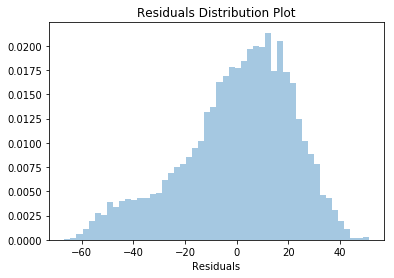

In [128]:
#Calculate residuals
train_preds = lm.fittedvalues
res = y_train - train_preds

#Residual distribution
ax = sns.distplot(res, kde = False, rug = False, norm_hist = True)
plt.title('Residuals Distribution Plot')
plt.xlabel('Residuals')
plt.show()

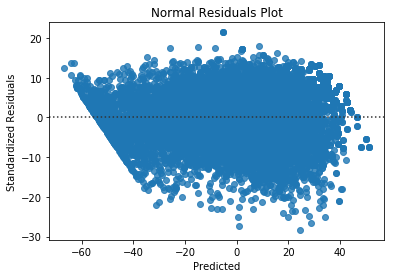

In [129]:
#Normal Residuals Plot
ax = sns.residplot(res, train_preds)
plt.title('Normal Residuals Plot')
plt.xlabel('Predicted')
ax.set_ylabel('Standardized Residuals')
plt.show()

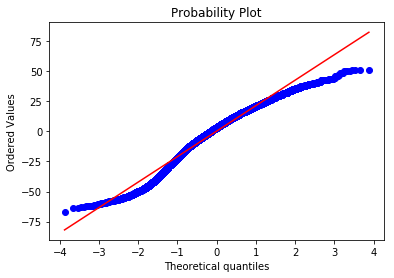

In [130]:
#Probability Plot
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

# Test Predictions

Train Root Mean Square Error: 21.48194127746703
Test Root Mean Square Error: 21.596388984038295


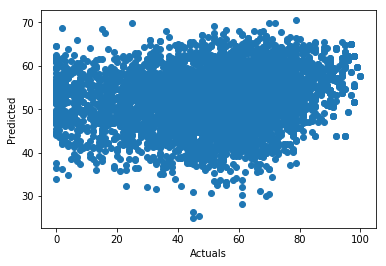

In [131]:
#Prediction on test set/plot predicted vs. actuals
test_preds = lm.predict(X_test)
plt.scatter(y_test, test_preds)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
#Train RMSE
train_rmse = sqrt(mean_squared_error(y_train, train_preds))
#Test RMSE
test_rmse = sqrt(mean_squared_error(y_test, test_preds)) 
print('Train Root Mean Square Error: ' + str(train_rmse))
print('Test Root Mean Square Error: ' + str(test_rmse))

# Lasso Regression

In [147]:
#Model definition
lasso_ = Lasso(max_iter = 1000)

lasso_params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}

#Gridsearch cross-validation 
lasso_model = GridSearchCV(lasso_, param_grid = lasso_params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_model.fit(X_train, y_train)
lasso_preds_train = lasso_model.predict(X_train)
lasso_preds_test = lasso_model.predict(X_test)

In [141]:
#Best Params/score
print('Best Params: ' + str(lasso_model.best_params_))
print('Best Score: ' + str(abs(lasso_model.best_score_)))

Best Params: {'alpha': 0.01}
Best Score: 453.1598275046737


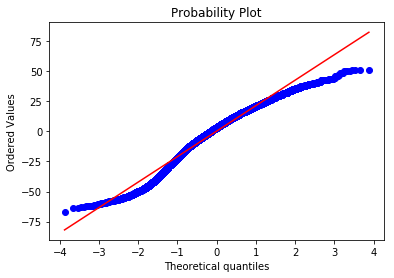

In [149]:
#Train probability Plot
lasso_res = y_train - lasso_preds_train
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

Train Root Mean Square Error: 21.243822766113688
Test Root Mean Square Error: 21.302226282612086


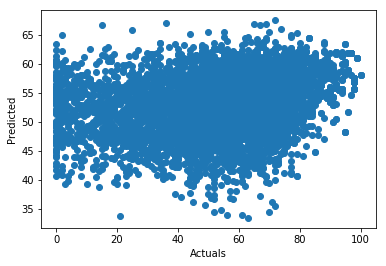

In [148]:
#Prediction on test set/plot predicted vs. actuals
plt.scatter(y_test, lasso_preds_test)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
#Train RMSE
train_rmse = sqrt(mean_squared_error(y_train, lasso_preds_train))
#Test RMSE
test_rmse = sqrt(mean_squared_error(y_test, lasso_preds_test)) 
print('Train Root Mean Square Error: ' + str(train_rmse))
print('Test Root Mean Square Error: ' + str(test_rmse))